In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('Taxi-v3', render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, _, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 200:
            done = True
        return state, reward, done, info


env = MyWrapper()

env.reset()

421

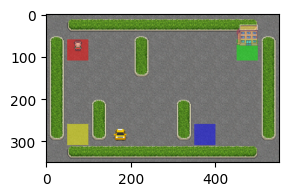

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [3]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Discrete(500)
env.action_space= Discrete(6)
state= 348
action= 2
next_state= 348
reward= -1
done= False
info= {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}


In [4]:
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = DQN(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    buffer_size=50000,  #最多积累N步最新的数据,旧的删除
    learning_starts=2000,  #积累了N步的数据以后再开始训练
    batch_size=64,  #每次采样N步
    tau=0.8,  #软更新的比例,1就是硬更新
    gamma=0.9,
    train_freq=(1, 'step'),  #训练的频率
    target_update_interval=1000,  #target网络更新的频率
    policy_kwargs={},  #网络参数
    verbose=0,
    device='cpu')

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-2000.0, 0.0)

In [6]:
# #训练N局游戏
# model.learn(50_0000, progress_bar=True)

# #保存模型
# model.save('save/3.DQN.Taxi')

In [7]:
#加载模型
model = DQN.load('save/3.DQN.Taxi')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(4.9, 5.166236541235795)

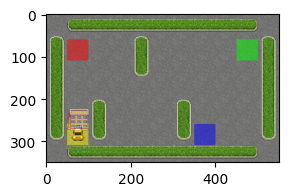

4 17 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 20]


In [12]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        action = action.item()
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 1 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()